In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def single_oscillator(time_sec, n, w, bound1, bound2):   
    time = np.linspace(0, time_sec, n)
    dT = time_sec/n
    pos = np.zeros(n)
    pos0 = bound2-bound1
    pos[0] = pos0
    pos[1] = pos0
    kappa = w*dT 
    for i in range(2, n):
        pos[i] = (2 - kappa**2)*pos[i-1] - pos[i-2]
    return pos, time

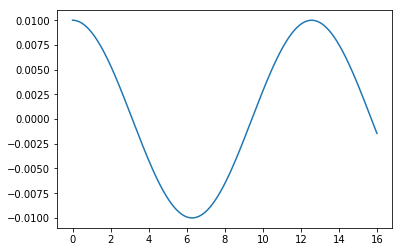

In [3]:
pos, time = single_oscillator(16, 10000, 0.5, 0.01, 0.02)
plt.plot(time, pos)

In [21]:
def u0_init(nx,A,L,m):
    x = np.linspace(0,L,nx)
    stand = A*np.sin(m*np.pi*x/L) # standing wave
    gauss = A*np.exp(-10*(x-0.25*L)**2) # Gaussian
    u0 = gauss #stand + gauss
    #u0 = stand + 0.7*A*np.sin((m+2)*np.pi*x/L) + 0.3*A*np.sin((m+4)*np.pi*x/L)
    #u0 = A*np.exp(-10*(x-0.2*L)**2) - A*np.exp(-10*(x-0.6*L)**2)
    return u0

def u_t0_init(nx,A,L,m):
    x = np.linspace(0,L,nx)
    u_t0 = np.zeros(nx) # no initial velocity
    #u_t0 = A*np.cos(m*np.pi*x/L)
    #u_t0 = 5*A*np.exp(-10*(x-0.3*L)**2)
    return u_t0

# Finite difference solver
def wave1D(nt,dt,dx,c,L,A,m,u0):
    un = np.zeros((nt,nx))
    u0 = u0Init(nx,A,L,m) 
    u_t0 = u_t0Init(nx,A,L,m)
    kappa = (c*dt/dx)**2
    un[0,:] = u0
    un[1,1:-2] = un[0,1:-2] - dt*u_t0[1:-2] + 0.5*kappa*(un[0,2:-1]-2*un[0,1:-2]+un[0,0:-3])
    #гран.условия
    un[1,0] = 0
    un[1,-1] = 0
    for i in range(1,nt-1):
        un[i+1,1:-2] = 2*un[i,1:-2]-un[i-1,1:-2] + kappa*(un[i,2:-1]-2*un[i,1:-2]+un[i,0:-3])
    #гран.условия
        un[i+1,0] = 0
        un[i+1,-1] = 0
    return un

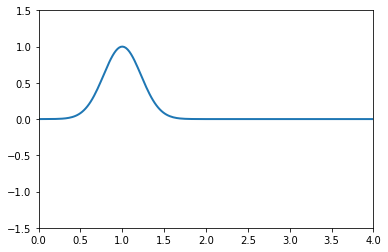

In [23]:
c = 10.0 #скорость волны
time = 10.0 #полное время
L = 4.0 #полная длина
nx = 200 #количество пространственных интервалов
dx = L/nx #шаг пространственного интервала
dt = dx/c #шаг временного интервала
nt = int(time/dt) #количество временных интервалов

#Задаем начальные параметры
m = 5 # number of nodes in initial conditions
A = 1.0 # amplitude of initial condition

# returns initial value for u


def animate(data):
    x = np.linspace(0,L,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(0,L),ylim=(-1.5*A,1.5*A))
line, = ax.plot([],[],lw=2)

un = wave1D(nt,dt,dx,c,L,A,m,u0Init(nx,A,L,m))

anim = animation.FuncAnimation(fig,animate,frames=un,interval=1)
plt.show()